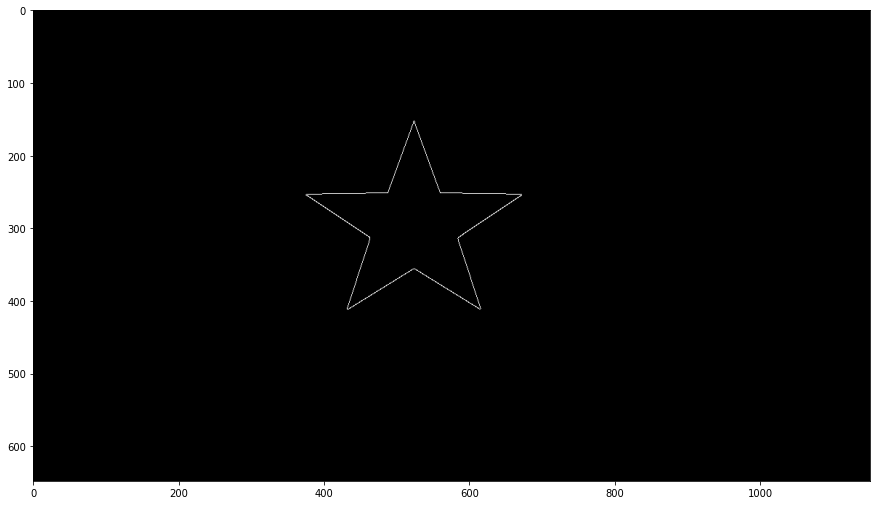

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
src = cv.imread("./starWhite.png")
gray_img = cv.cvtColor(src,cv.COLOR_BGR2GRAY)
canny_image = cv.Canny(gray_img,50,150)
plt.rcParams["figure.figsize"] = [15,15]
plt.imshow(canny_image,cmap='gray')

[array([[[524, 152]],

       [[523, 153]],

       [[523, 156]],

       ...,

       [[526, 157]],

       [[525, 156]],

       [[525, 153]]], dtype=int32)]


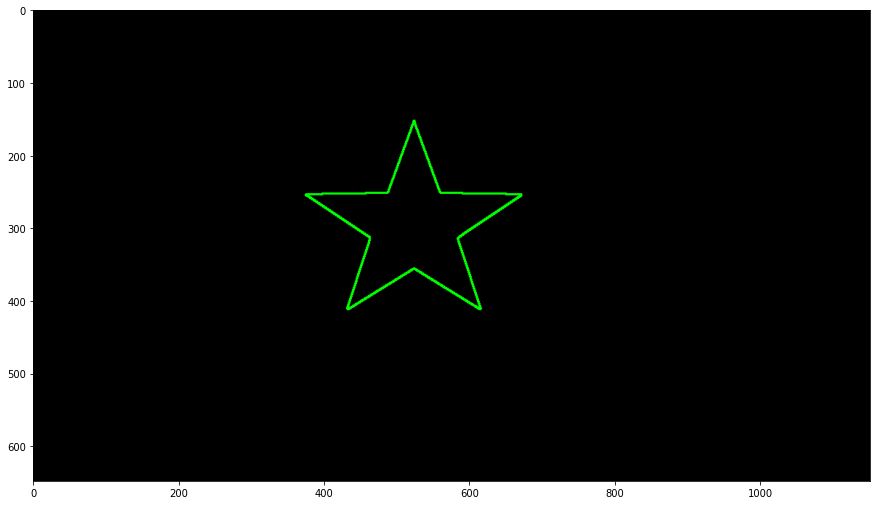

In [2]:
##Contour Finding
contours, hierarchy = cv.findContours(canny_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
edge_img = canny_image.copy()
print(contours)

drawn_contour_img = np.zeros(edge_img.shape,dtype=np.uint8)
drawn_contour_img = cv.cvtColor(drawn_contour_img,cv.COLOR_GRAY2RGB)
cv.drawContours(drawn_contour_img, contours, -1, (0,255,0), 2) # -1 วาด วาดทุกอัน // ถ้าบางอัน ใส่เลขindexของContourที่ต้องการวาด
plt.imshow(drawn_contour_img)
#Contour คือจุดที่ ต่อ ๆ กัน เรียงกันเป็นวัตถุ
plt.show()

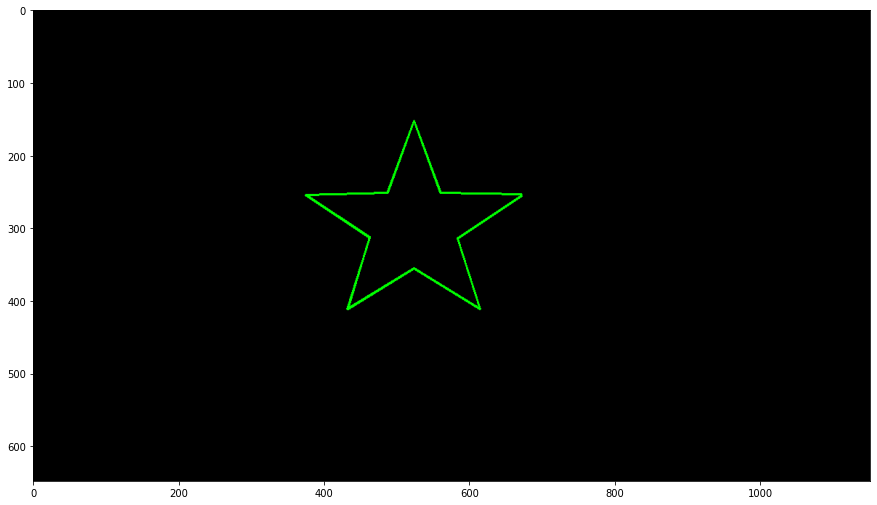

In [3]:
## Polygon Approximation
contours_approx = []
for i, value in enumerate(contours):
   contours_approx.append(cv.approxPolyDP(contours[i],50,True))
drawn_approx_contour_img = np.zeros(edge_img.shape,dtype=np.uint8)
drawn_approx_contour_img = cv.cvtColor(drawn_approx_contour_img,cv.COLOR_GRAY2RGB)
cv.drawContours(drawn_approx_contour_img, contours_approx, -1, (0,255,0), 2) # -1 วาด วาดทุกอัน // ถ้าบางอัน ใส่เลขindexของContourที่ต้องการวาด
plt.imshow(drawn_approx_contour_img)
#Contour คือจุดที่ ต่อ ๆ กัน เรียงกันเป็นวัตถุ
plt.show()

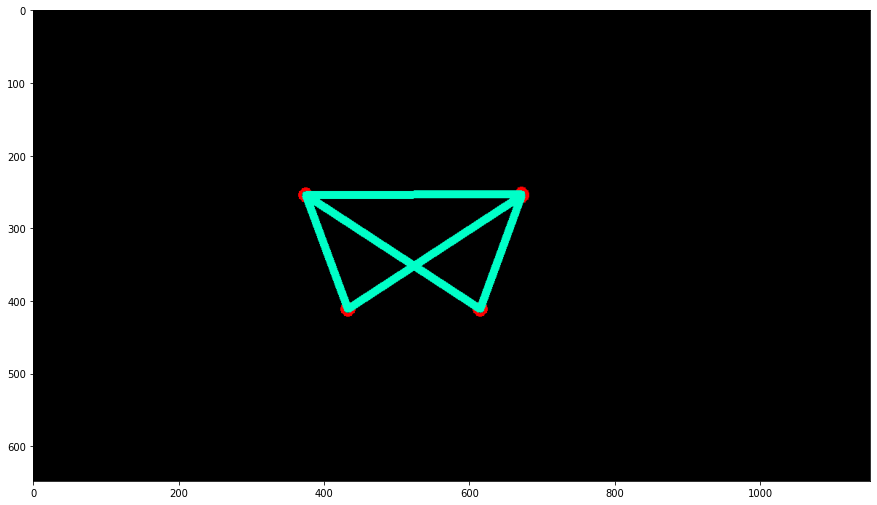

In [4]:
contours_approx = []
for i,value in enumerate(contours):
    contours_approx.append( cv.approxPolyDP(contours[i],0.05*cv.arcLength(contours[i],True),True) )
drawn_approx_contour_img = np.zeros(edge_img.shape,dtype=np.uint8) # สร้างภาพเปล่าๆ ขึ้นมาเพื่อวาด Contourที่เราหาได้
drawn_approx_contour_img = cv.cvtColor(drawn_approx_contour_img,cv.COLOR_GRAY2RGB)
''' plot จุดยอด'''
for i,values in enumerate(contours_approx):
    for j,dot in enumerate(values):
        drawn_approx_contour_img = cv.circle(drawn_approx_contour_img, dot[0], 8, (255,0,0), 3)
''' ลากเส้นระหว่างจุด '''
cv.drawContours(drawn_approx_contour_img, contours_approx, -1, (0,255,200), 10) # -1 วาด วาดทุกอัน // ถ้าบางอัน ใส่เลขindexของContourที่ต้องการวาด
plt.imshow(drawn_approx_contour_img)
plt.show()

--------------------------------Moment/Centroid----------------------------------------

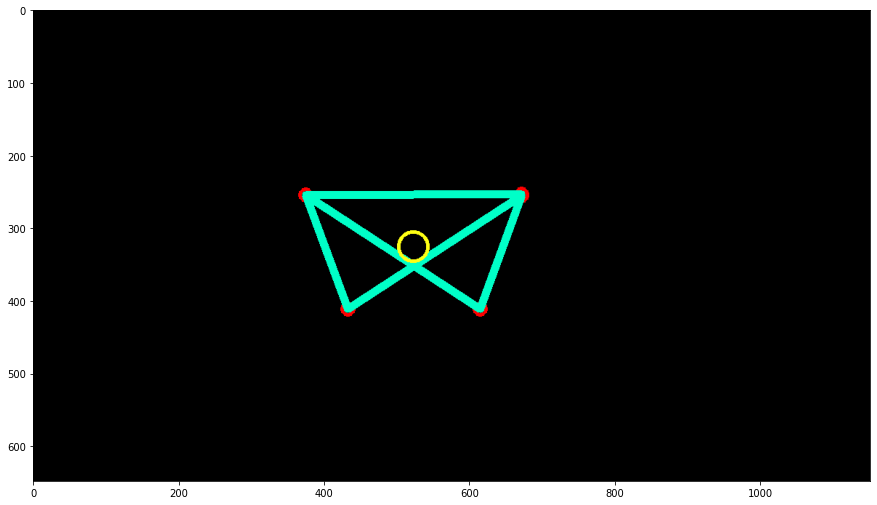

In [5]:
M = cv.moments(contours[0]) # get moment
cx = int(M['m10']/M['m00']) # get centroid x
cy = int(M['m01']/M['m00']) # get centroid y
drawn_approx_contour_img = cv.circle(drawn_approx_contour_img, (cx,cy), 20, (255,255,20), 3) #สีเหลือง
plt.imshow(drawn_approx_contour_img)
plt.show()


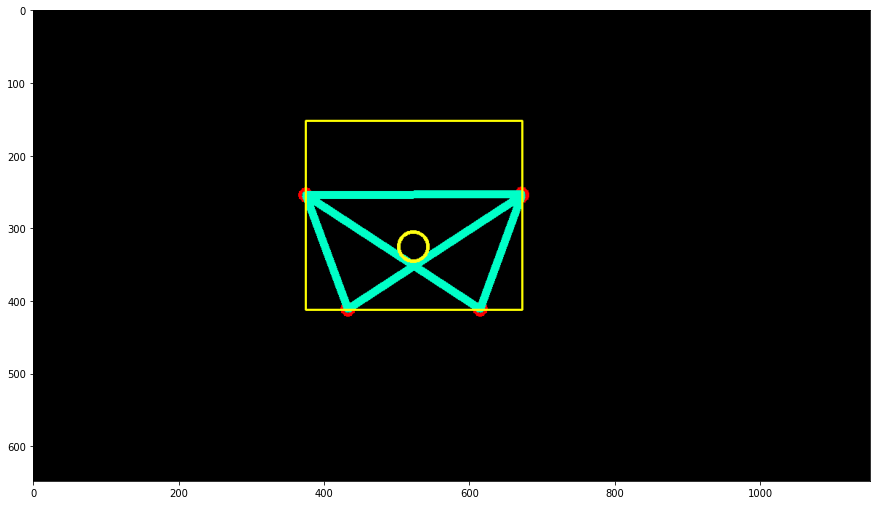

In [6]:
#boundary 
x,y,w,h = cv.boundingRect(contours[0])
cv.rectangle(drawn_approx_contour_img,(x,y),(x+w,y+h),(255,255,0),2)
plt.imshow(drawn_approx_contour_img)
plt.show()

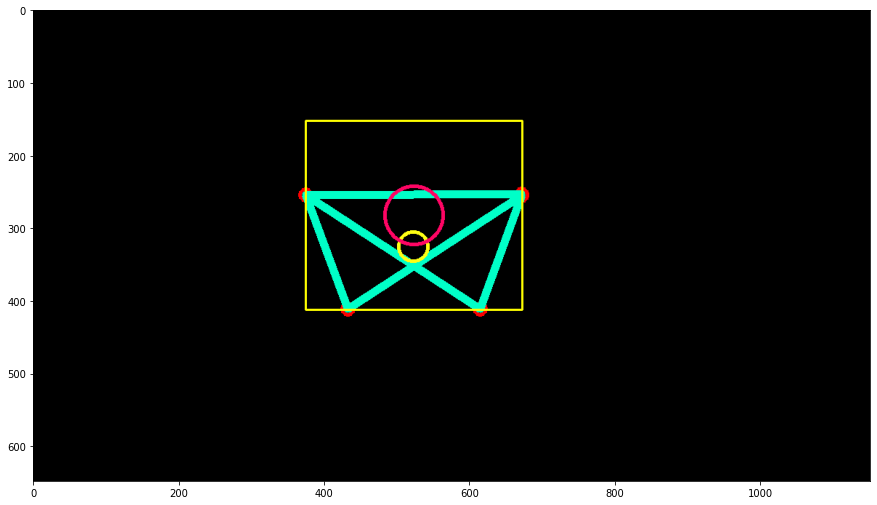

In [7]:
#Center
center = [x+(w//2), y+(h//2)]
drawn_approx_contour_img = cv.circle(drawn_approx_contour_img, center, 40, (255,5,100), 3) # สีชมพู
plt.imshow(drawn_approx_contour_img)
plt.show()

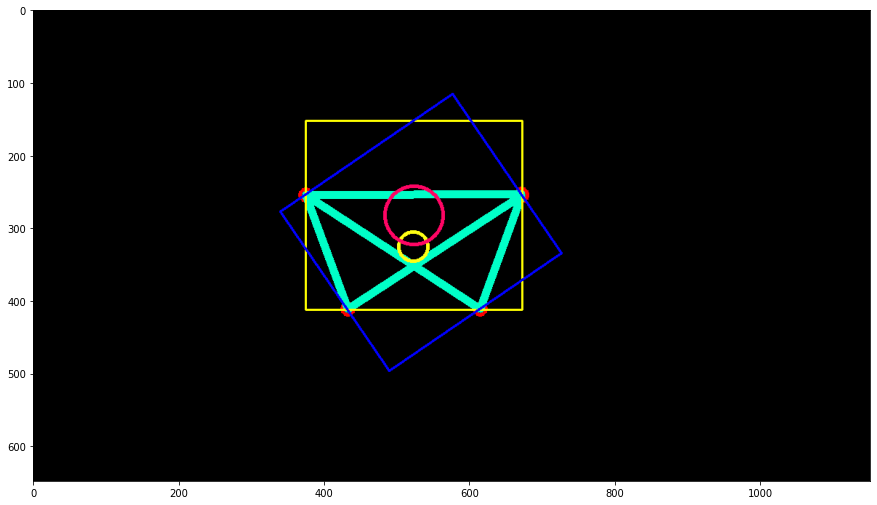

In [8]:

rect = cv.minAreaRect(contours[0])
box = cv.boxPoints(rect)
box = np.int0(box)
cv.drawContours(drawn_approx_contour_img,[box],0,(0,0,255),2) # สีน้ำเงิน
plt.imshow(drawn_approx_contour_img)
plt.show()

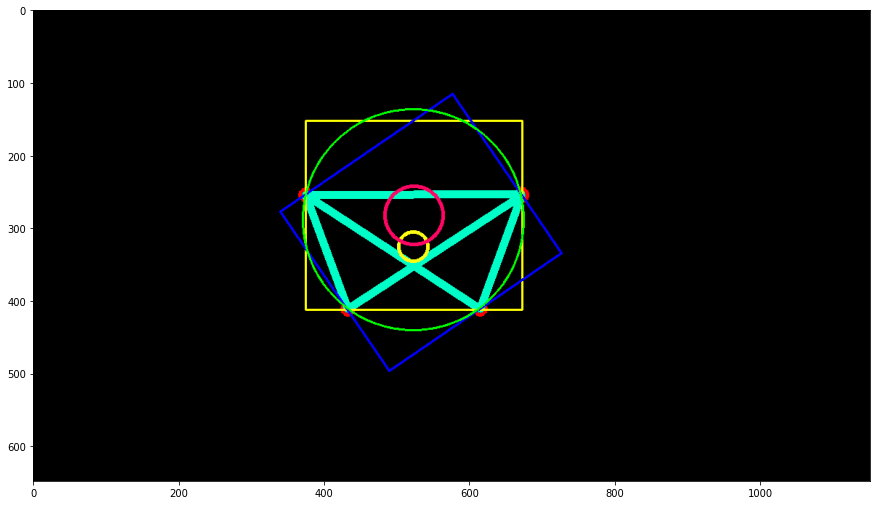

In [9]:
#Min Circle
(x,y),radius = cv.minEnclosingCircle(contours[0])
center = (int(x),int(y))
radius = int(radius)
cv.circle(drawn_approx_contour_img,center,radius,(0,255,0),2) # สีเขียว
plt.imshow(drawn_approx_contour_img)
plt.show()

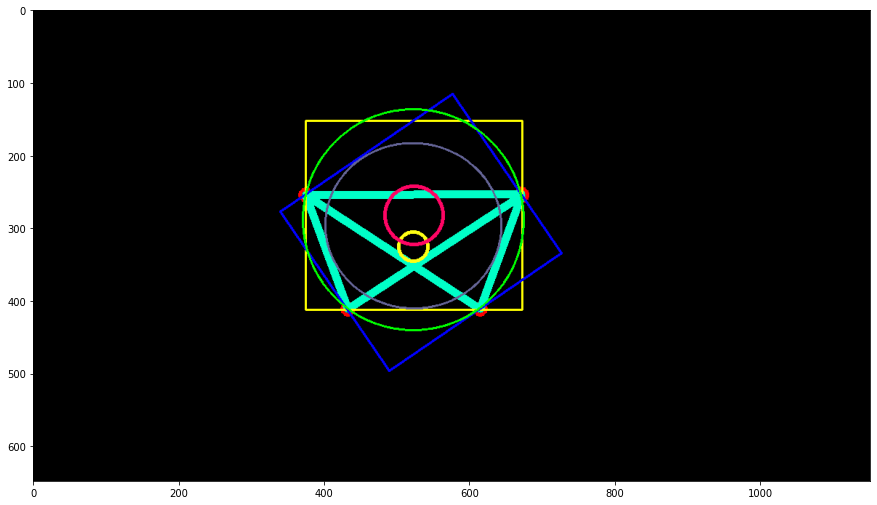

In [10]:
#elipse
ellipse = cv.fitEllipse(contours[0])
cv.ellipse(drawn_approx_contour_img,ellipse,(100,100,150),2) # สีม่วง
plt.imshow(drawn_approx_contour_img)
plt.show()